In [20]:
# Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("medical_cost_insurance.csv")  # read the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


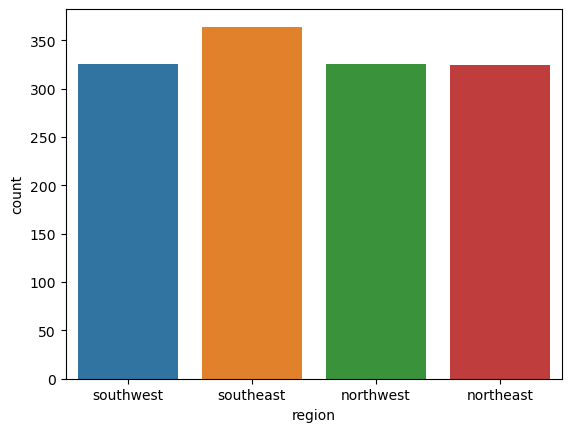

In [5]:
# plot each class freequency
sns.countplot(x='region', data=data)
plt.show()

## Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Data Standardization


In [6]:
#Replace Lable columns into binary codes
data['sex'] = data['sex'].replace({'male':1,'female':0})
data['smoker'] = data['smoker'].replace({'yes':1,'no':0})
data['region'] = data['region'].replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [7]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


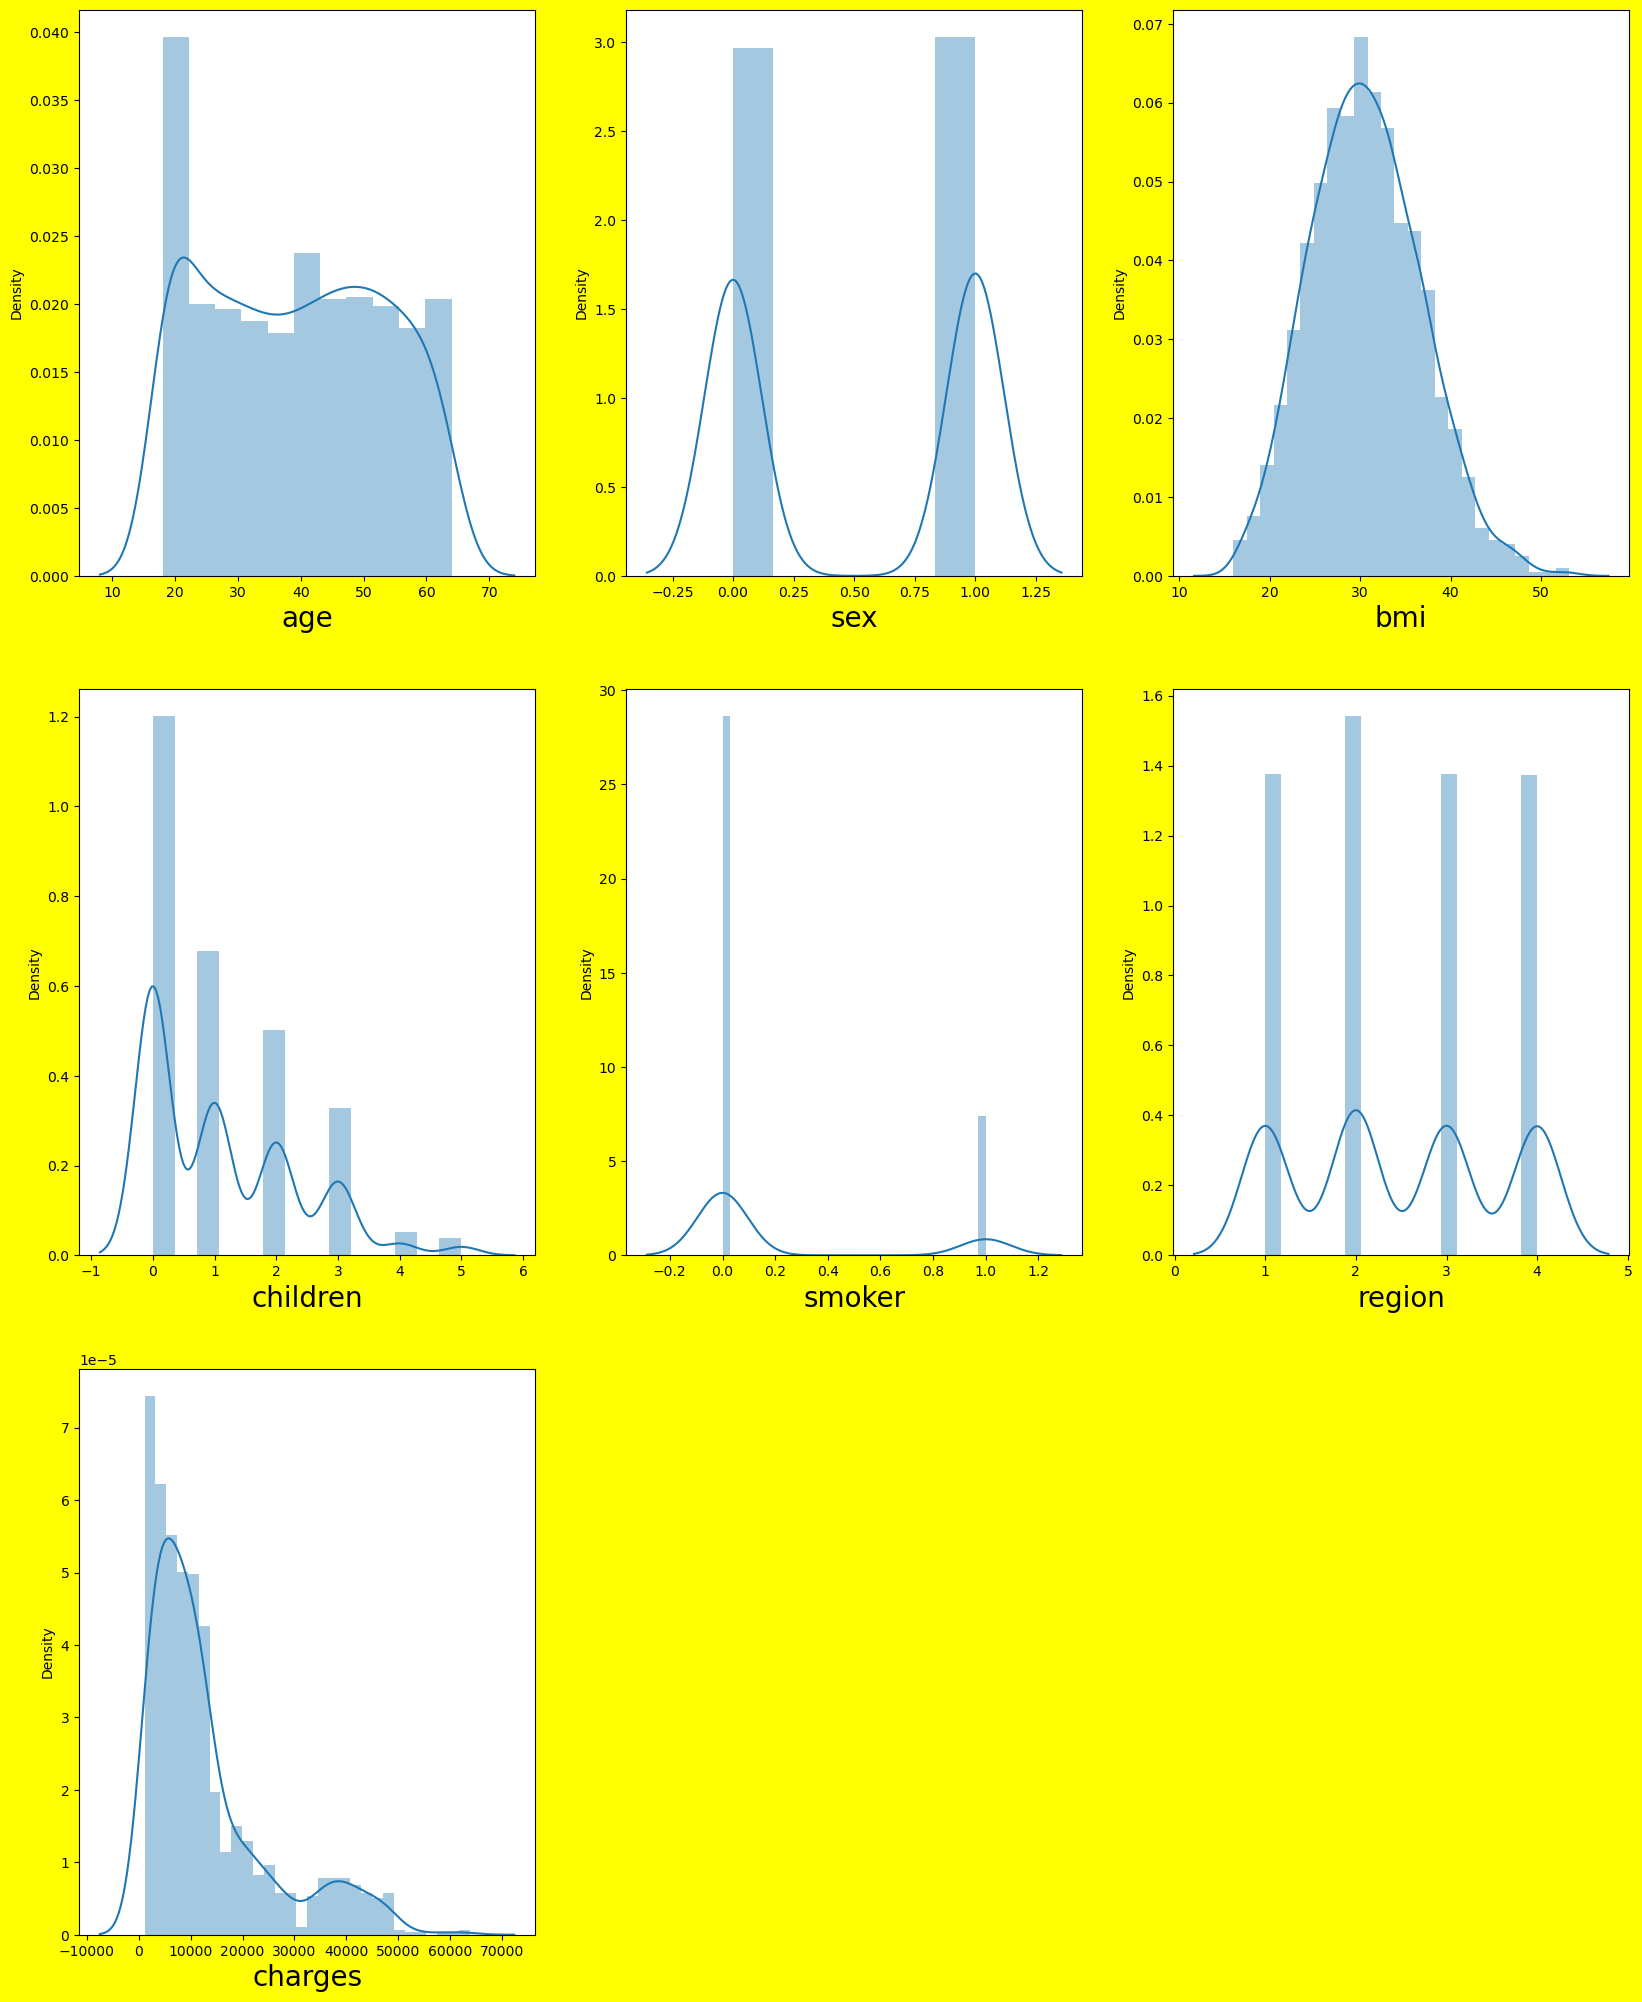

In [8]:
# Let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=7 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1   
plt.show()

In [9]:
X = data.drop(columns = ['charges'])
y = data['charges']

In [10]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [11]:
X_scaled.shape[1]

6

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state=355)

In [21]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [25]:
data.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,0,25.80,0,0,1,2007.9450
1337,61,0,29.07,0,1,3,29141.3603


In [27]:
# Since we have already fit the scaler, you can transform the data
print('charges : ', regression.predict(scalar.transform([[61, 0, 29.7, 0, 1,3]])))

charges :  [37151.38562486]


In [28]:
#adjusted R2
regression.score(x_train,y_train)

0.7618981357698096

In [29]:
regression.score(x_test,y_test)

0.7132422842597336

In [31]:
y_pred = regression.predict(x_test)

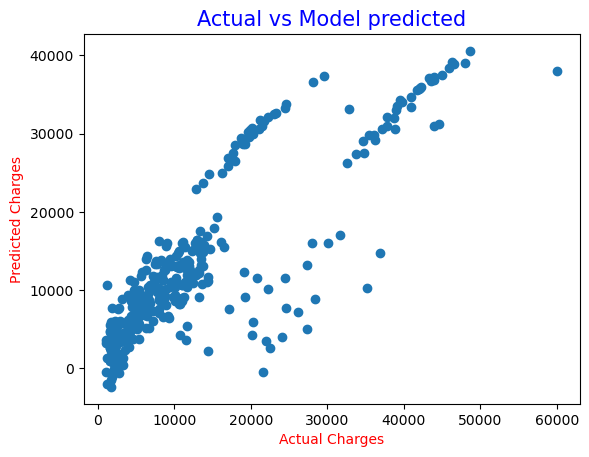

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges', fontsize=10, color='r')
plt.ylabel('Predicted Charges', fontsize=10, color='r')
plt.title('Actual vs Model predicted', fontsize=15, color='b')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
# MAE
mean_absolute_error(y_test,y_pred)

4426.454747692232

In [35]:
# MSE
mean_squared_error(y_test,y_pred)

40148079.778518155

In [36]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

6336.251240167025